# PreRequisites

Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [2]:
train_data = pd.read_csv("dataset/train.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Missing Values

In [5]:
train_data.drop("Cabin", axis = 1, inplace = True)

In [6]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)

In [7]:
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace = True)

Data Analysis

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Finding the count of people that survived and those that didn't
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Visualizing the Data

[]

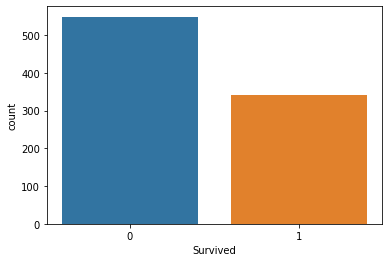

In [10]:
#Count plot for the column "Survived"
sns.countplot(x = "Survived", data = train_data)
plt.plot()

[]

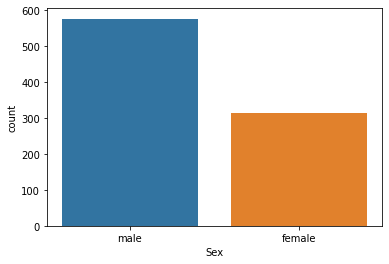

In [11]:
#Count plot for the column "Sex"
sns.countplot(x = "Sex", data = train_data)
plt.plot()

[]

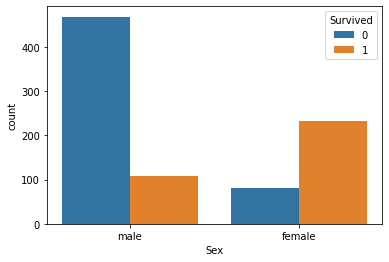

In [12]:
#Count plot for the column "Survived, Gender Wise"
sns.countplot(x = "Sex", data = train_data, hue = "Survived")
plt.plot()

[]

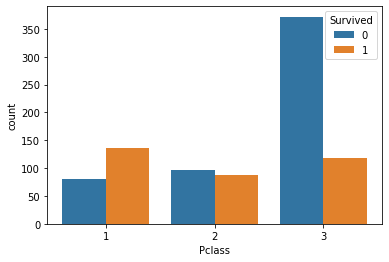

In [13]:
#Count plot for the column "Pclass", based on who Survived
sns.countplot(x = "Pclass", hue = "Survived", data = train_data)
plt.plot()

Categorical Encoding (All text values to computer understandable Numeric Values)

In [14]:
#male = 0, female = 1; s = 0, c = 1, q = 2
train_data.replace({"Sex": {"male": 0, "female": 1}, "Embarked": {"S": 0, "C": 1, "Q": 2}}, inplace = True)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating Features & Target

In [16]:
drop_col = train_data.drop(columns = ["PassengerId", "Name", "Ticket", "Survived"], axis = 1)
survived = train_data["Survived"]

Splitting Training and Test Data

In [17]:
drop_col_train, drop_col_test, survived_train, survived_test = train_test_split(drop_col, survived, test_size = 0.2, random_state = 2)

In [18]:
drop_col.shape, drop_col_train.shape, drop_col_test.shape

((891, 7), (712, 7), (179, 7))

# Model Training

Logistic Regression

X = Input Features;
Y = Prediction Probability

In [19]:
X = drop_col
Y = survived
X_train, X_test = drop_col_train, drop_col_test
Y_train, Y_test = survived_train, survived_test

In [20]:
model = LogisticRegression()

In [21]:
#training the LogisticRegression model with the training data
model.fit(X_train, Y_train)

c:\users\venka\downloads\courses\python dev\apps\titanic with ml\virtual\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [22]:
#the training model's accuracy
X_train_prediction = model.predict(X_train)

In [23]:
accuracy = accuracy_score(Y_train, X_train_prediction)

In [24]:
#the training model's accuracy for test values
X_test_prediction = model.predict(X_test)

In [25]:
accuracy_test = accuracy_score(Y_test, X_test_prediction)

In [26]:
print(f"Accuracy Score of the Training Data is {accuracy*100}%")
print(f"Accuracy Score of the Test Data is {accuracy_test*100}%")

Accuracy Score of the Training Data is 80.75842696629213%
Accuracy Score of the Test Data is 78.2122905027933%
